In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from wordcloud import WordCloud
from scipy import stats
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

In [2]:
df = pd.read_csv('content_data.csv')

In [3]:
df.head()

,Course Name,University,Difficulty Level,Course Rating,Course URL,Course Description,Skills
0,Write A Feature Length Screenplay For Film Or ...,Michigan State University,Beginner,4.8,https://www.coursera.org/learn/write-a-feature...,Write a Full Length Feature Film Script In th...,Drama Comedy peering screenwriting film D...
1,Business Strategy: Business Model Canvas Analy...,Coursera Project Network,Beginner,4.8,https://www.coursera.org/learn/canvas-analysis...,"By the end of this guided project, you will be...",Finance business plan persona (user experien...
2,Silicon Thin Film Solar Cells,�cole Polytechnique,Advanced,4.1,https://www.coursera.org/learn/silicon-thin-fi...,This course consists of a general presentation...,chemistry physics Solar Energy film lambda...
3,Finance for Managers,IESE Business School,Intermediate,4.8,https://www.coursera.org/learn/operational-fin...,"When it comes to numbers, there is always more...",accounts receivable dupont analysis analysis...
4,Retrieve Data using Single-Table SQL Queries,Coursera Project Network,Beginner,4.6,https://www.coursera.org/learn/single-table-sq...,In this course you�ll learn how to effectively...,Data Analysis select (sql) database manageme...


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3522 entries, 0 to 3521
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Course Name         3522 non-null   object
 1   University          3522 non-null   object
 2   Difficulty Level    3522 non-null   object
 3   Course Rating       3522 non-null   object
 4   Course URL          3522 non-null   object
 5   Course Description  3522 non-null   object
 6   Skills              3522 non-null   object
dtypes: object(7)
memory usage: 192.7+ KB


In [5]:
df.tail()

,Course Name,University,Difficulty Level,Course Rating,Course URL,Course Description,Skills
3517,"Capstone: Retrieving, Processing, and Visualiz...",University of Michigan,Beginner,4.6,https://www.coursera.org/learn/python-data-vis...,"In the capstone, students will build a series ...",Databases syntax analysis web Data Visuali...
3518,Patrick Henry: Forgotten Founder,University of Virginia,Intermediate,4.9,https://www.coursera.org/learn/henry,"�Give me liberty, or give me death:� Rememberi...",retirement Causality career history of the ...
3519,Business intelligence and data analytics: Gene...,Macquarie University,Advanced,4.6,https://www.coursera.org/learn/business-intell...,�Megatrends� heavily influence today�s organis...,analytics tableau software Business Intellig...
3520,Rigid Body Dynamics,Korea Advanced Institute of Science and Techno...,Beginner,4.6,https://www.coursera.org/learn/rigid-body-dyna...,"This course teaches dynamics, one of the basic...",Angular Mechanical Design fluid mechanics F...
3521,Architecting with Google Kubernetes Engine: Pr...,Google Cloud,Intermediate,4.7,https://www.coursera.org/learn/deploying-secur...,"In this course, ""Architecting with Google Kube...",bigtable bigquery SQL Google Cloud Platform...


In [6]:
df.describe()

,Course Name,University,Difficulty Level,Course Rating,Course URL,Course Description,Skills
count,3522,3522,3522,3522,3522,3522,3522
unique,3416,184,5,31,3424,3397,3424
top,Google Cloud Platform Fundamentals: Core Infra...,Coursera Project Network,Beginner,4.7,https://www.coursera.org/learn/gcp-fundamentals,This course introduces you to important concep...,Google Cloud Platform Big Data Cloud Infrast...
freq,8,562,1444,740,8,8,8


In [7]:
df.isnull().sum()

Course Name           0
University            0
Difficulty Level      0
Course Rating         0
Course URL            0
Course Description    0
Skills                0
dtype: int64

In [44]:
df['Course Name']

0       write a feature length screenplay for film or ...
1       business strategy: business model canvas analy...
2                           silicon thin film solar cells
3                                    finance for managers
4            retrieve data using single-table sql queries
                              ...                        
3517    capstone: retrieving, processing, and visualiz...
3518                     patrick henry: forgotten founder
3519    business intelligence and data analytics: gene...
3520                                  rigid body dynamics
3521    architecting with google kubernetes engine: pr...
Name: Course Name, Length: 3522, dtype: object

In [45]:
df['Difficulty Level'].value_counts()

Difficulty Level
beginner          1444
advanced          1005
intermediate       837
conversant         186
not calibrated      50
Name: count, dtype: int64

In [46]:
df['Course Rating'].value_counts()

Course Rating
4.7    740
4.6    623
4.8    598
4.5    389
4.4    242
4.9    180
4.3    165
4.2    121
5.0     90
4.1     85
4.0     51
3.8     24
3.9     20
3.6     18
3.7     18
3.5     17
3.4     13
3.0     12
3.2      9
3.3      6
2.9      6
2.6      2
2.8      2
2.4      2
1.0      2
2.0      1
2.5      1
3.1      1
1.9      1
2.3      1
Name: count, dtype: int64

In [47]:
df['University'].value_counts()

University
coursera project network                      562
university of illinois at urbana-champaign    138
johns hopkins university                      110
university of colorado boulder                101
university of michigan                        101
                                             ... 
university of nebraska                          1
pontificia universidad cat�lica de chile        1
vmware                                          1
e-learning development fund                     1
the world bank group                            1
Name: count, Length: 184, dtype: int64

In [49]:
# Normalize text data by converting to lowercase
df['Course Name'] = df['Course Name'].str.lower()
df['University'] = df['University'].str.lower()
df['Difficulty Level'] = df['Difficulty Level'].str.lower()
df['Course URL'] = df['Course URL'].str.lower()
df['Course Description'] = df['Course Description'].str.lower()
df['Skills'] = df['Skills'].str.lower()

In [12]:
# Combine text columns to create a single feature for text-based analysis
text_columns = ['Course Name', 'University', 'Difficulty Level', 'Course Rating', 'Course Description', 'Skills']
df['Content'] = df[text_columns].apply(lambda x: ' '.join(x.astype(str)), axis=1)

In [13]:
# Convert 'Course Rating' to numeric (assuming it is stored as a string initially)
df['Course Rating'] = pd.to_numeric(df['Course Rating'], errors='coerce')

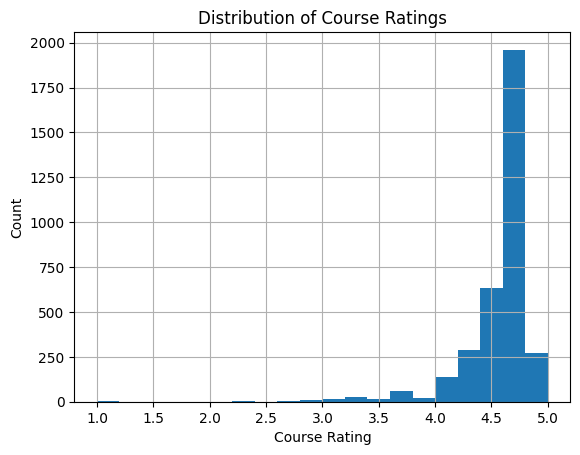

In [14]:
# Histograms for numeric data (Course Rating)
df['Course Rating'].hist(bins=20)
plt.xlabel('Course Rating')
plt.ylabel('Count')
plt.title('Distribution of Course Ratings')
plt.show()

In [15]:
# Select numeric columns for correlation matrix
numeric_df = df.select_dtypes(include='number')
print("Numeric columns:\n", numeric_df.head())

Numeric columns:
    Course Rating
0            4.8
1            4.8
2            4.1
3            4.8
4            4.6


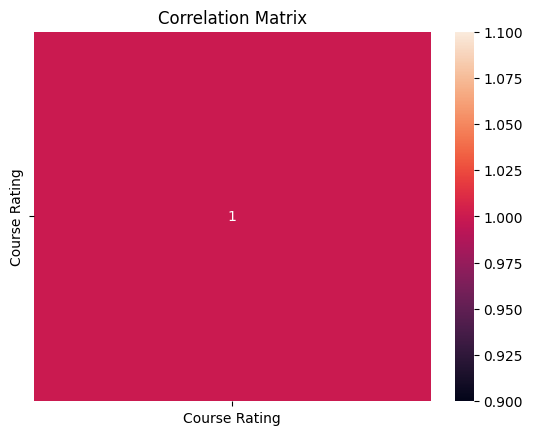

In [16]:
# Check if there are any numeric columns to avoid empty selection
if not numeric_df.empty:
    # Correlation matrix for numeric data only
    correlation_matrix = numeric_df.corr()
    sns.heatmap(correlation_matrix, annot=True)
    plt.title('Correlation Matrix')
    plt.show()
else:
    print("No numeric columns available for correlation matrix.")

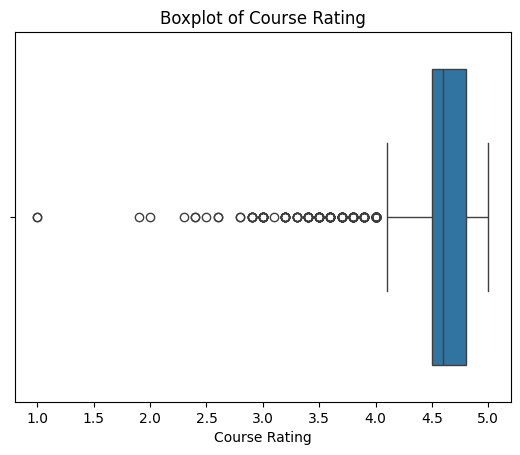

In [19]:
# Outlier detection
sns.boxplot(x='Course Rating', data=df)
plt.title('Boxplot of Course Rating')
plt.show()

In [40]:
# Frequency distribution of categorical variables
for col in df.select_dtypes(include=['object']).columns:
    print(df[col].value_counts())

Course Name
google cloud platform fundamentals: core infrastructure                      8
data visualization with python                                               4
the art of music production                                                  4
python for data science and ai                                               4
introduction to artificial intelligence (ai)                                 4
                                                                            ..
managing asthma, allergies, diabetes, and seizures in school                 1
global challenges in business capstone                                       1
severe to profound intellectual disability: circles of care and education    1
teaching children with visual impairment: creating empowering classrooms     1
programming languages, part a                                                1
Name: count, Length: 3416, dtype: int64
University
coursera project network                      562
university of illi

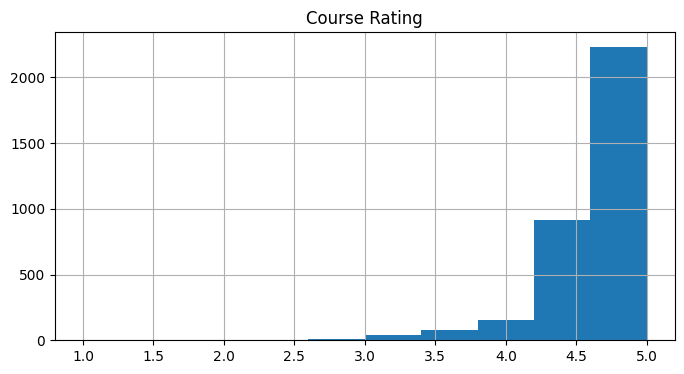

In [21]:
# Data visualization
# Histograms
df.hist(figsize=(8, 4))
plt.show()

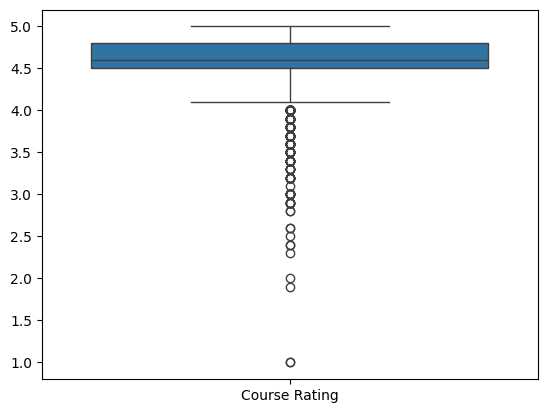

In [22]:
# Box plots
sns.boxplot(data=df)
plt.show()

In [26]:
df.columns

Index(['Course Name', 'University', 'Difficulty Level', 'Course Rating',
       'Course URL', 'Course Description', 'Skills', 'Content'],
      dtype='object')

In [33]:
# Segment by university and analyze each segment
for university in df['University'].unique():
    subset = df[df['University'] == university]
    print(f'Analysis for University: {university}')
    print(subset.describe(include='all'))  # Include all columns for a comprehensive description
    print()

Analysis for University: michigan state university
                                              Course Name  \
count                                                  32   
unique                                                 32   
top     write a feature length screenplay for film or ...   
freq                                                    1   
mean                                                  NaN   
std                                                   NaN   
min                                                   NaN   
25%                                                   NaN   
50%                                                   NaN   
75%                                                   NaN   
max                                                   NaN   

                       University Difficulty Level  Course Rating  \
count                          32               32      31.000000   
unique                          1                4            NaN   
top     m

In [28]:
# Convert 'Difficulty Level' and 'Course Rating' to appropriate types if necessary
df['Difficulty Level'] = df['Difficulty Level'].astype(str)  # Ensure 'Difficulty Level' is treated as a string
df['Course Rating'] = pd.to_numeric(df['Course Rating'], errors='coerce')

In [29]:
# Define the groups
easy_courses = df[df['Difficulty Level'].str.contains('easy', case=False, na=False)]
medium_courses = df[df['Difficulty Level'].str.contains('medium', case=False, na=False)]
hard_courses = df[df['Difficulty Level'].str.contains('hard', case=False, na=False)]

In [30]:
# Print comparisons
print('Comparison between Easy, Medium, and Hard Courses')

print('Easy Courses')
print(easy_courses.describe(include='all'))

print('\nMedium Courses')
print(medium_courses.describe(include='all'))

print('\nHard Courses')
print(hard_courses.describe(include='all'))

Comparison between Easy, Medium, and Hard Courses
Easy Courses
       Course Name University Difficulty Level  Course Rating Course URL  \
count            0          0                0            0.0          0   
unique           0          0                0            NaN          0   
top            NaN        NaN              NaN            NaN        NaN   
freq           NaN        NaN              NaN            NaN        NaN   
mean           NaN        NaN              NaN            NaN        NaN   
std            NaN        NaN              NaN            NaN        NaN   
min            NaN        NaN              NaN            NaN        NaN   
25%            NaN        NaN              NaN            NaN        NaN   
50%            NaN        NaN              NaN            NaN        NaN   
75%            NaN        NaN              NaN            NaN        NaN   
max            NaN        NaN              NaN            NaN        NaN   

       Course Descriptio

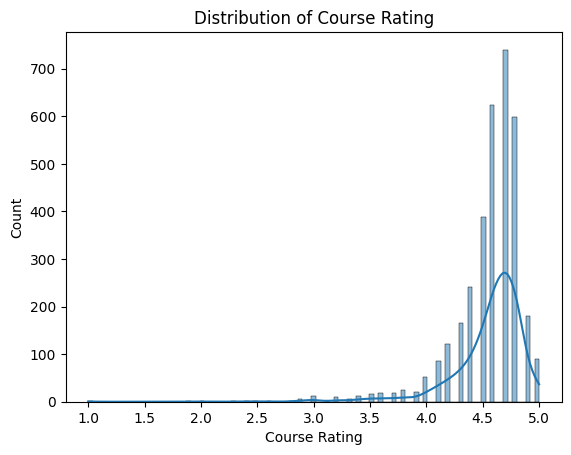

In [31]:
# Distribution analysis
for col in df.select_dtypes(include=[np.number]).columns:
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

In [35]:
# Assuming 'Rating' is the target column 
features = ['Course Name', 'University', 'Difficulty Level', 'Course Rating',
       'Course URL', 'Course Description', 'Skills', 'Content']
X = df[features]
y = df['Course Name']  

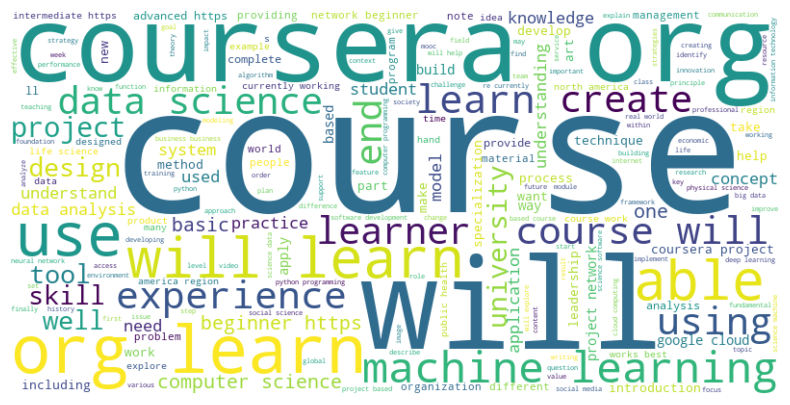

In [36]:
# Combine text columns to create a single feature for text-based analysis
text_columns = ['Course Name', 'University', 'Difficulty Level', 'Course Rating',
       'Course URL', 'Course Description', 'Skills', 'Content']
df['Content'] = df[text_columns].apply(lambda x: ' '.join(x.astype(str)), axis=1)

# Generate a word cloud based on the combined content
if 'Content' in df.columns:
    text = ' '.join(df['Content'].astype(str))
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()
else:
    print("No 'Content' column to generate word cloud")

In [37]:
# Vectorize the content
vectorizer = TfidfVectorizer(stop_words='english')
content_matrix = vectorizer.fit_transform(df['Content'])

# Calculate similarity between content
cosine_similarities = linear_kernel(content_matrix, content_matrix)

In [38]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [51]:
# Function to get course recommendations based on course name
def recommendations(course_name, cosine_similarities=cosine_similarities, df=df):
    course_name = course_name.lower()  # Ensure the course name is in lowercase for matching
    if course_name not in df['Course Name'].str.lower().values:
        return []
    
    idx = df[df['Course Name'].str.lower() == course_name].index[0]
    sim_scores = list(enumerate(cosine_similarities[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:6]  # Get top 5 recommendations
    recommendations = [
        {
            'Course Name': df.iloc[i]['Course Name'],
            'University': df.iloc[i]['University'],
            'Difficulty Level': df.iloc[i]['Difficulty Level'],
            'Course Rating': df.iloc[i]['Course Rating'],
            'Course URL': df.iloc[i]['Course URL'],
            'Course Description': df.iloc[i]['Course Description'],
            'Skills': df.iloc[i]['Skills']
        }
        for i, score in sim_scores
    ]
    return recommendations# Convert 'Difficulty Level' and 'Course Rating' to appropriate types if necessary
df['Difficulty Level'] = df['Difficulty Level'].astype(str)  # Ensure 'Difficulty Level' is treated as a string
df['Course Rating'] = pd.to_numeric(df['Course Rating'], errors='coerce')

In [53]:
print("--------------- Similar content to enhance your learning outcome  --------------:\n")
recommendations('Finance for Managers')

--------------- Similar content to enhance your learning outcome  --------------:



[{'Course Name': 'finance for non-financial managers',
  'University': 'emory university',
  'Difficulty Level': 'beginner',
  'Course Rating': np.float64(4.2),
  'Course URL': 'https://www.coursera.org/learn/finance-for-non-financial-managers',
  'Course Description': 'finance is for �non-financial managers� who want to understand key financial principles and apply them in a real-world context. over the course of the program window, you will work your way through a series of nine modules that move from understanding basic financial principles to applying financial analysis and ratios to drive decisions. in addition, each module is capped with an ending self-evaluation to ensure that you have absorbed the following key learning objectives:  + understand the language associated with finance + know how and when  to use financial terms and analysis techniques + read and assess company performance using financial statements + recognize the link between organizational strategy and financial